In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default= 'plotly_white'      # Taking default color

In [52]:
df= pd.read_csv("Superstoredb.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [54]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [55]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Coverting date column

In [57]:
df['Order Date']= pd.to_datetime(df['Order Date'])
df['Ship Date']= pd.to_datetime(df['Ship Date'])
print(df['Order Date'].dtypes)                                 
print(df['Ship Date'].dtypes)                                 

datetime64[ns]
datetime64[ns]


# Splitting the order date column in days, month and year

In [59]:
df['Order Year']= df['Order Date'].dt.year
df['Order Month']= df['Order Date'].dt.month
df['Order Day of week']= df['Order Date'].dt.dayofweek

In [60]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,6


# Monthly sales analysis

In [62]:
sales= df.groupby('Order Month')['Sales'].sum().reset_index()
sales

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


In [63]:
px.line(sales, x='Order Month', y='Sales', title='Monthly sales anaysis')

#  Sales by category

In [65]:
sales2= df.groupby('Category')['Sales'].sum().reset_index()

# px.line(sales2, x='Category', y='Sales', title='Product Sales')        # linechart

                           # OR

fig= px.pie(sales2, values='Sales', names='Category', hole=0.4, title='Product Sales')      # piechart
fig.update_traces(textinfo='percent + label')

# Sales analysis based on sub-category

In [67]:
sales3= df.groupby('Sub-Category')['Sales'].sum().reset_index()
px.bar(sales3, x='Sub-Category', y='Sales', title='Sub category Sales')   

# Sales and Profit by customer segments

In [97]:
# Group and aggregate data
sales4 = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Melt the DataFrame to long format
melted_df = sales4.melt(id_vars='Segment', value_vars=['Sales', 'Profit'],
                                         var_name='Metric', value_name='Amount')

melted_df

,Segment,Metric,Amount
0,Consumer,Sales,1.161401e+06
1,Corporate,Sales,7.061464e+05
2,Home Office,Sales,4.296531e+05
3,Consumer,Profit,1.341192e+05
4,Corporate,Profit,9.197913e+04
5,Home Office,Profit,6.029868e+04


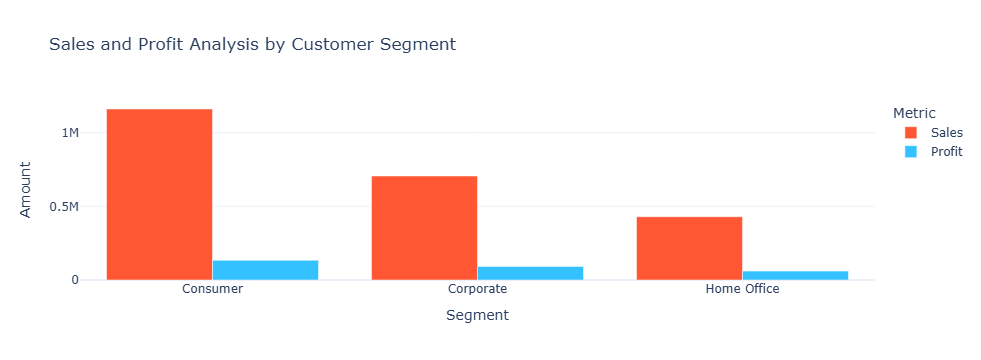

In [103]:
px.bar(melted_df, x='Segment', y='Amount', color='Metric',
                       color_discrete_sequence=['#FF5733', '#33C1FF'], 
                       barmode='group', title='Sales and Profit Analysis by Customer Segment')

# Sales to profit ratio

In [72]:
ratio = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
ratio['sales to profit ratio']= ratio['Sales'] / ratio['Profit']
print( ratio[['Segment', 'sales to profit ratio']])

       Segment  sales to profit ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
